## Importing libraries and reading csv file

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df=pd.read_csv('US_Accidents_March23.csv')

## Data Cleaning

Drops all unwanted columns in the data frame to make it easier to work with and to look at

In [114]:
df=df.drop(['Source','Start_Time','End_Time', 'Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)','Description','Zipcode','County','Timezone','Airport_Code','Weather_Timestamp','Wind_Chill(F)','Humidity(%)','Pressure(in)','Wind_Direction','Wind_Speed(mph)','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station', 'Stop','Traffic_Calming','Turning_Loop','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],axis=1)

In [115]:
df.head()

,ID,Severity,Street,City,State,Country,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset
0,A-1,3,I-70 E,Dayton,OH,US,36.9,10.0,0.02,Light Rain,False,Night
1,A-2,2,Brice Rd,Reynoldsburg,OH,US,37.9,10.0,0.00,Light Rain,False,Night
2,A-3,2,State Route 32,Williamsburg,OH,US,36.0,10.0,NaN,Overcast,True,Night
3,A-4,3,I-75 S,Dayton,OH,US,35.1,9.0,NaN,Mostly Cloudy,False,Night
4,A-5,2,Miamisburg Centerville Rd,Dayton,OH,US,36.0,6.0,NaN,Mostly Cloudy,True,Day


In [116]:
df.shape

(7728394, 12)

remove other states other than NC

In [117]:
df=df[df['State']=='NC']

In [118]:
df.shape
#confirmed that it is only NC

(338199, 12)

In [119]:
df['Precipitation(in)']=df['Precipitation(in)'].fillna(0)
#replaces any NaNs with 0 in precipitation

uses a dictionary to group together similar weather conditions and adds it to a new column in the data frame to make visualizations easier to read

In [120]:
weather_map = {
        # Clear conditions
    'Clear': 'Clear',
    'Sunny': 'Clear',
    'Mostly Clear': 'Clear',
    'Partly Cloudy': 'Clear',

    # Cloudy / Overcast
    'Overcast': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Scattered Clouds': 'Cloudy',
    'Cloudy': 'Cloudy',

    # Rain / Drizzle
    'Rain': 'Rain',
    'Light Rain': 'Rain',
    'Heavy Rain': 'Rain',
    'Drizzle': 'Rain',
    'Light Rain Showers': 'Rain',
    'Light Freezing Rain': 'Rain',
    'Light Freezing Drizzle': 'Rain',

    # Snow / Ice
    'Snow': 'Snow/Ice',
    'Light Snow': 'Snow/Ice',
    'Sleet': 'Snow/Ice',
    'Ice': 'Snow/Ice',
    'Hail': 'Snow/Ice',

    # Fog / Haze / Mist
    'Haze': 'Fog/Haze',
    'Mist': 'Fog/Haze',
    'Fog': 'Fog/Haze',
    'Shallow Fog': 'Fog/Haze',

    # Catch-all for missing / unexpected values
    '': 'Other',
    None: 'Other',
    
}

checks the counts on each of the different weather groups and creates the weather grouped column and if any other Nan's are in the data set it will go to the other category

In [121]:
df['Weather_Grouped'] = df['Weather_Condition'].map(weather_map).fillna('Other')

In [122]:
df['Weather_Grouped'].value_counts()

Weather_Grouped
Cloudy      137969
Other       101336
Clear        65841
Rain         26451
Fog/Haze      5578
Snow/Ice      1024
Name: count, dtype: int64

turns the different cities in NC to either urban or suburban lists 

In [123]:
# Urban cities
urban_cities = ["Charlotte", "Raleigh", "Durham", "Greensboro", "Winston-Salem", 
                "Fayetteville", "Cary", "Chapel Hill", "High Point", "Concord",
                "Gastonia", "Wilmington", "Greenville", "Asheville"]

# Suburban cities
suburban_cities = ["Garner", "Apex", "Morrisville", "Matthews", "Huntersville",
                   "Holly Springs", "Mooresville", "Wake Forest", "Knightdale",
                   "Fuquay-Varina", "Clayton", "Leland", "Indian Trail", "Davidson",
                   "Hillsborough", "Kannapolis", "Mount Holly", "Newton", "Thomasville",
                   "Cornelius", "Belmont", "Jamestown", "Asheboro", "Lexington", "Tarboro",
                   "Sanford", "Roxboro"]


lo0ps through each city and if found in urban_cities or Suburban_cities will group them in that category and if not found then it will classify it as a rural city 

In [124]:
def classify_city(city):
    if city in urban_cities:
        return "Urban"
    elif city in suburban_cities:
        return "Suburban"
    else:
        return "Rural"

cretaes the City_type column in data set and adds the classification and then shows the first 20 lines to ensure that the city type is correct

In [125]:
df['City_Type'] = df['City'].apply(classify_city)

# Check the result
print(df[['City', 'City_Type']].head(20))

             City City_Type
512240  Charlotte     Urban
512241  Charlotte     Urban
512242  Charlotte     Urban
512259     Garner  Suburban
512268  Charlotte     Urban
512274   New Hill     Rural
512302     Durham     Urban
512308  Charlotte     Urban
512309  Charlotte     Urban
512327     Garner  Suburban
512341  Charlotte     Urban
512342  Charlotte     Urban
512391  Charlotte     Urban
512392  Charlotte     Urban
512394  Charlotte     Urban
512395  Charlotte     Urban
512396  Charlotte     Urban
512397  Charlotte     Urban
512398  Charlotte     Urban
512399  Charlotte     Urban


In [126]:
df.head()

,ID,Severity,Street,City,State,Country,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,Weather_Grouped,City_Type
512240,A-512254,1,Quality Dr,Charlotte,NC,US,70.0,10.0,0.0,Cloudy,False,Night,Cloudy,Urban
512241,A-512255,1,Olde English Dr,Charlotte,NC,US,69.0,10.0,0.0,Mostly Cloudy,False,Night,Cloudy,Urban
512242,A-512256,1,Brookshire Blvd,Charlotte,NC,US,69.0,10.0,0.0,Mostly Cloudy,True,Night,Cloudy,Urban
512259,A-512274,1,Benson Rd,Garner,NC,US,71.0,10.0,0.0,Cloudy,False,Night,Cloudy,Suburban
512268,A-512285,1,Chastain Parc Dr,Charlotte,NC,US,69.0,10.0,0.0,Mostly Cloudy,False,Night,Cloudy,Urban


## Visualizations

**Created a countplot to show a visualization if day or night impact severity or more accidents on a scale of 100,000 accidents**

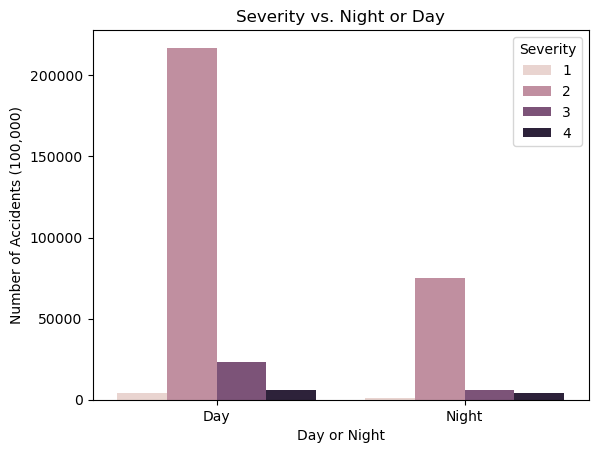

In [127]:
sns.countplot(data=df, x='Sunrise_Sunset', hue='Severity', order=['Day', 'Night']) #shows data is from df, the x axis is using the day or night values, and that severity is showed through the different colored bars
plt.title("Severity vs. Night or Day") # main title
plt.xlabel("Day or Night") #x label
plt.ylabel('Number of Accidents (100,000)') # y label
plt.show()

**Created a heat map to show correlation between city type and severity**

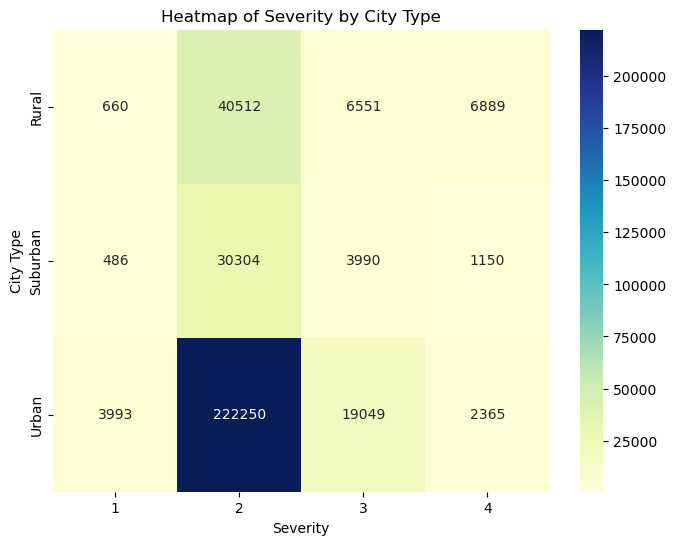

In [128]:
severity_citytype = pd.crosstab(df['City_Type'], df['Severity']) #counts the number of occurrences of each combination of two variables (AI was used as a template and explanation

# Plot heatmap
plt.figure(figsize=(8,6)) # size of map so it is easily read
sns.heatmap(
    severity_citytype,  # the 2D table to visualize
    annot=True,         # display the numbers inside each cell
    fmt='d',            # format the numbers as integers (not floats)
    cmap='YlGnBu'       # color palette: Yellow → Green → Blue
)        
plt.title("Heatmap of Severity by City Type") #title
plt.xlabel("Severity") #x label
plt.ylabel("City Type")# ylable
plt.show()

**Created a coutplot to show the amount of accidents (100,000 scale) in different weather types and showing the different severity**

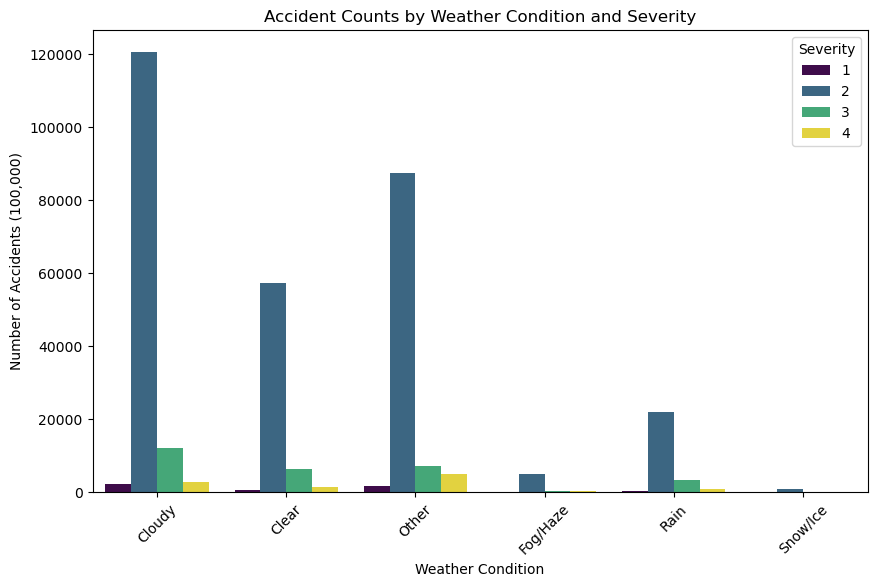

In [129]:
plt.figure(figsize=(10,6)) # changes the size to make sure it is visible and easy to read
sns.countplot(
    data=df,     # data
    x='Weather_Grouped', #x axis data
    hue='Severity', # changes color based on severity
    palette='viridis'  # gradient color for hues (AI)
)
plt.title('Accident Counts by Weather Condition and Severity')  #title
plt.xlabel('Weather Condition') #x axis label
plt.ylabel('Number of Accidents (100,000)') # y axis label
plt.xticks(rotation=45) #tilts x-axis labels so they don't overlap (AI)
plt.legend(title='Severity') # labels and shows key for the differnt hues
plt.show()

**Crated a stacked bar chart To show if a traffic signal was present or not and th severity of the accident**

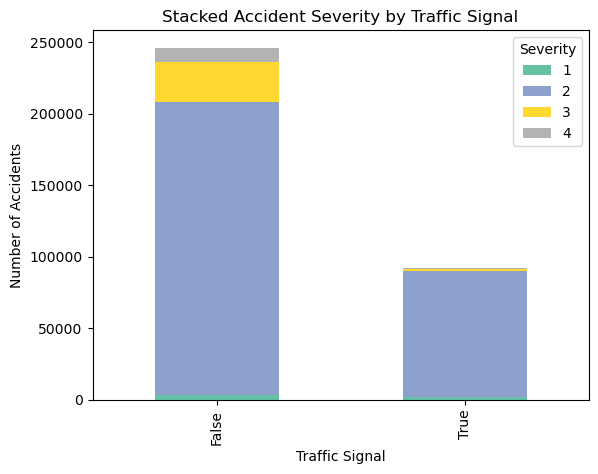

In [130]:
## Group the DataFrame by 'Traffic_Signal' and 'Severity', then count the number of rows in each group (AI used to explain and help build)
signal_counts = df.groupby(['Traffic_Signal', 'Severity'], observed=False).size().unstack(fill_value=0) #observed=false was added to silent a warneing about python changing(AI used to help fix)
signal_counts.plot(kind='bar', stacked=True, colormap='Set2') # uses the signal_counts to plot the groups together in a stacked bar chart, and having varying colors in severity with color map
plt.xlabel("Traffic Signal") # x label
plt.ylabel('Number of Accidents') #y label
plt.title('Stacked Accident Severity by Traffic Signal') # title
plt.show()